# Google Top Stories - An exploration

This dataset was collected during the pandemic, it contains headlines shown by Google Search.

The dataset is organized by year, month, date, hour, in a series of nested folders. The leaf folders contain JSON files with information about top stories. 

Your goal is to write first Python function that takes the name of the folder "GoogleTopStories" and stores the content of all the JSON files into a single CSV file. Once you have a CSV file, you can practice your pandas & seaborn skills in analyzing the data.

Some tips and ideas for analysis:
1. Use the Python command `os.walk` to iteratively traverse the nested subfolders. Account for hidden files that start with .
2. Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.
3. Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)
4. Create a heatmap that shows the distribution of domains across the 'story_position' values.
5. Create timeseries of unique articles per month by query type. (This is challenging.)

In [87]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [66]:
def getCSV(folder):
    df = pd.DataFrame()

    for i in os.walk(folder):
        if i[1] == []:
            path = i[0]
            
            for f in i[2]:
                if f[-5:] == '.json':
                    myFile = path+"\\"+f 
                    thisDF = pd.read_json(myFile)

                df = pd.concat([df, thisDF], ignore_index=True)
                
    return df

In [67]:
data = getCSV("GoogleTopStories")

In [68]:
data.head()

,title,url,source,time,date,query,story_position,domain,category
0,Six new coronavirus symptoms just officially a...,https://www.miamiherald.com/news/coronavirus/a...,Miami Herald,1 day ago,2020-04-25 22:00:00,coronavirus symptoms,1,www.miamiherald.com,NaN
1,Coronavirus FAQs: Are There Lots Of Cases With...,https://www.npr.org/sections/goatsandsoda/2020...,NPR,1 day ago,2020-04-25 22:00:00,coronavirus symptoms,2,www.npr.org,NaN
2,CDC adds 6 new possible coronavirus symptoms,https://www.ktvq.com/news/coronavirus/cdc-adds...,KTVQ.com,2 hours ago,2020-04-25 22:00:00,coronavirus symptoms,3,www.ktvq.com,NaN
3,WHO says no evidence shows that having coronav...,https://www.cnn.com/2020/04/25/us/who-immunity...,CNN.com,6 hours ago,2020-04-25 22:00:00,coronavirus test,1,www.cnn.com,NaN
4,'No Evidence' Yet That Recovered COVID-19 Pati...,https://www.npr.org/sections/coronavirus-live-...,NPR,11 hours ago,2020-04-25 22:00:00,coronavirus test,2,www.npr.org,NaN


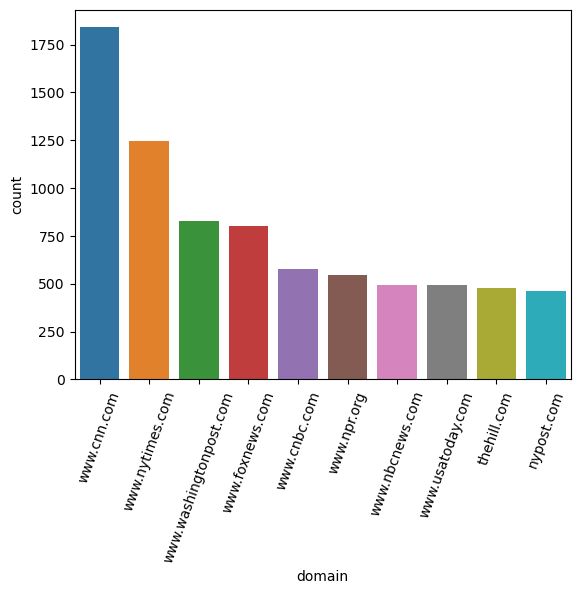

In [88]:
forBar = data['domain'].value_counts()[:10]

sns.barplot(x=forBar.index, y=forBar)
plt.xticks(rotation=70)
plt.show()

In [106]:
dataForHeat = pd.pivot_table(data, values='story_position', columns='domain', aggfunc='mean')
dataForHeat

domain,13wham.com,6abc.com,abc11.com,abc13.com,abc17news.com,abc30.com,abc3340.com,abc6onyourside.com,abc7.com,abc7chicago.com,...,www.wvlt.tv,www.wvtm13.com,www.wwlp.com,www.wwltv.com,www.wxii12.com,www.wxyz.com,www.wyff4.com,www.yahoo.com,www.yourdailyjournal.com,wydaily.com
story_position,4.25,6.081081,4.285714,4.0,5.5,3.0,8.0,3.5,3.571429,4.083333,...,6.333333,4.666667,5.553846,3.0,4.25,4.333333,5.916667,5.569444,6.0,10.0


In [107]:
#sns.heatmap(dataForHeat, cmap='RdYlGn_r', linewidths=0.5, annot=True)